In [1]:
import os

import matplotlib.pyplot as plt

from astropy.table import Table

Definition of LSBG

- Freeman 1970: 
    - central surface brightness - $\mu_{B, 0}$ > 22.7 mag $arcsec^{-2}$ 
- McGaugh et al. 2001    
    - central maximum stellar surface densities - $\Sigma_{*, 0}$ < 100 $M_{\odot}$ $pc^{-2}$

Things to check

- redshift range
- volume limited(preferred) vs. magnitude limited
- surface brightness distribution as a function of redshift
- comepleteness?
- How to convert sdss filter sets into UBVRI
- inclination

magnitude conversion
- https://arxiv.org/pdf/1007.4014.pdf
- https://arxiv.org/pdf/1811.04569.pdf
- Kim & Lee 2013, How Does the Surface Density and Size of Disk Galaxies Measured in Hydrodynamic Simulations Correlate with the Halo SpinParameter?

### bulge
- Sersic profile:
    - $\Sigma(r) = \Sigma_{e}\exp{(-k((\frac{r}{r_{e}})^{\frac{1}{n}} - 1))}$, surface brightness at radius r
    - $k = 1.9992n - 0.3271$
    
- de Vaucoulers profile:
    - $n = 4$ 
    - bulge of late-type spiral (n = 1), bright ellipticals / bulge of early-type spiral (n = 4)
    
### disk
- exponential profile:
    - $\Sigma(r) = \Sigma_{0}\exp{(-\frac{r}{r_{d}})}$
    - $\Sigma_{0} = central surface brightness$, $r_{d} = disc scale length$

In [2]:
os.listdir('./bottrell/stz855_supplemental_files/Stripe82_DeepMorphologies_TXT')

['sdss_s82_morph_gr_ps.txt',
 'sdss_s82_morph_zr_fn.txt',
 'sdss_s82_morph_zr_ps.txt',
 '__MACOSX',
 'sdss_s82_morph_gr_fn.txt',
 'sdss_s82_morph_gr_n4.txt',
 'sdss_s82_morph_zr_n4.txt',
 'sdss_s82_morph_ir_ps.txt',
 'sdss_s82_morph_ur_ps.txt',
 'sdss_s82_morph_ir_fn.txt',
 'sdss_s82_morph_ur_fn.txt',
 'sdss_s82_morph_ur_n4.txt',
 'sdss_s82_morph_ir_n4.txt']

In [3]:
path = './bottrell/stz855_supplemental_files/Stripe82_DeepMorphologies_TXT/'

- (ps) single-component Sersic profile
- (n4) two-component nb = 4 bulge and exponential disc
- (fn) two-component free-nb bulge and exponential disc

In [8]:
tbl_fn = Table.read(path + 'sdss_s82_morph_gr_fn.txt', format = 'ascii')
tbl_ps = Table.read(path + 'sdss_s82_morph_gr_ps.txt', format = 'ascii')
tbl_n4 = Table.read(path + 'sdss_s82_morph_gr_n4.txt', format = 'ascii')

In [9]:
tbl_ps.keys()

['objID',
 'dr7_objID',
 'ra',
 'decl',
 'run',
 'rerun',
 'camcol',
 'field',
 'ID',
 'petroMag_r',
 'extinction_r',
 'z',
 'sciim_nx',
 'sciim_ny',
 'prchost',
 'start_time',
 'end_time',
 'dfm_r',
 'f_r',
 'dfp_r',
 'dg2dmagm_r',
 'g2dmag_r',
 'dg2dmagp_r',
 'dbtm_r',
 'bt_r',
 'dbtp_r',
 'drem',
 're',
 'drep',
 'dem',
 'e',
 'dep',
 'dphibm',
 'phib',
 'dphibp',
 'drdm',
 'rd',
 'drdp',
 'didm',
 'incd',
 'didp',
 'dphidm',
 'phid',
 'dphidp',
 'ddxm_g',
 'dx_g',
 'ddxp_g',
 'ddym_g',
 'dy_g',
 'ddyp_g',
 'ddbm_r',
 'db_r',
 'ddbp_r',
 'dnm',
 'n',
 'dnp',
 'rhalf_r',
 'rchi2_r',
 'c1_r',
 'c2_r',
 'c3_r',
 'c4_r',
 'a_r',
 'da_r',
 'az2_1_r',
 'az2_2_r',
 'az3_1_r',
 'az3_2_r',
 'az5_1_r',
 'az5_2_r',
 'dz_r',
 'rt1_1_r',
 'rt1_2_r',
 'rt1_3_r',
 'ra1_1_r',
 'ra1_2_r',
 'ra1_3_r',
 'prcflag',
 'rd_kpc',
 're_kpc',
 'rhalf_kpc_r',
 'petroR50_r',
 'mu50_r',
 'Vmax',
 'Mr_galaxy',
 'Mr_bulge',
 'Mr_disk',
 'Mg_galaxy',
 'Mg_bulge',
 'Mg_disk',
 'extinction_g',
 'petroMag_g',
 'dfm_g

In [19]:
# tbl_ps['mu50_g']

In [ ]:
tbl_ps['n'] #sersic index
tbl_ps['re'] # bulge effective radius [arcsec]


radii = np.range(0, 25, 0.1) 

plt.plot(radii, )

In [20]:
tbl_ps['f_r']

1901330.0
636981.0
396374.0
170367.0
1792140.0
220124.0
156596.0
192498.0
199432.0
469592.0
282664.0


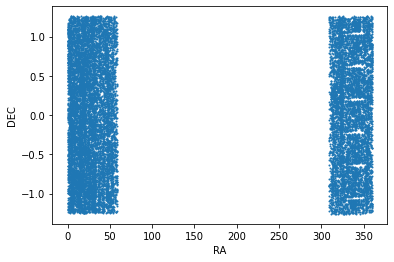

In [82]:
plt.scatter(tbl['ra'], tbl['decl'], s = 1)

plt.xlabel('RA')
plt.ylabel('DEC')

plt.savefig('./figs/target_distribution.png')

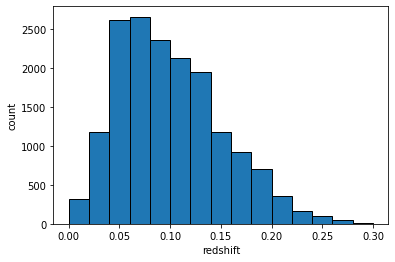

In [83]:
plt.hist(tbl[tbl['z'] > 0]['z'], bins  = np.arange(0, 0.32, 0.02), edgecolor = 'black')

plt.xlabel('redshift')
plt.ylabel('count')

plt.savefig('./figs/z_distribution.png')

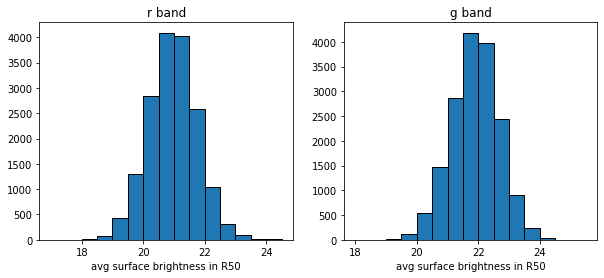

In [86]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

ax[0].hist(np.array(tbl['mu50_r']), edgecolor = 'black', bins = np.arange(17, 25, 0.5))
ax[0].set_xlabel('avg surface brightness in R50')
ax[0].set_title('r band')

ax[1].hist(np.array(tbl['mu50_g']), edgecolor = 'black', bins = np.arange(18, 26, 0.5))
ax[1].set_xlabel('avg surface brightness in R50')
ax[1].set_title('g band')

fig.savefig('./figs/mu50_distribution.png')

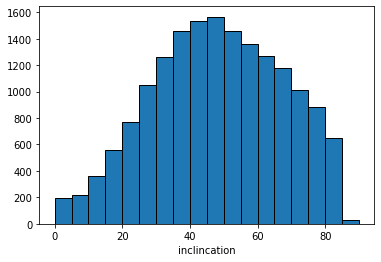

In [87]:
plt.hist(tbl['incd'], edgecolor = 'black', bins = np.arange(0, 95, 5))

plt.xlabel('inclincation')

plt.savefig('./figs/incd_distribution.png')

In [96]:
mask_incl = tbl['incd'] < 30
mask_mu = tbl['mu50_g'] > 23

In [98]:
sum(mask_incl & mask_mu), sum(mask_incl), sum(mask_mu)

(241, 3151, 1188)

In [100]:
tbl.keys()

['objID',
 'dr7_objID',
 'ra',
 'decl',
 'run',
 'rerun',
 'camcol',
 'field',
 'ID',
 'petroMag_r',
 'extinction_r',
 'z',
 'sciim_nx',
 'sciim_ny',
 'prchost',
 'start_time',
 'end_time',
 'dfm_r',
 'f_r',
 'dfp_r',
 'dg2dmagm_r',
 'g2dmag_r',
 'dg2dmagp_r',
 'dbtm_r',
 'bt_r',
 'dbtp_r',
 'drem',
 're',
 'drep',
 'dem',
 'e',
 'dep',
 'dphibm',
 'phib',
 'dphibp',
 'drdm',
 'rd',
 'drdp',
 'didm',
 'incd',
 'didp',
 'dphidm',
 'phid',
 'dphidp',
 'ddxm_g',
 'dx_g',
 'ddxp_g',
 'ddym_g',
 'dy_g',
 'ddyp_g',
 'ddbm_r',
 'db_r',
 'ddbp_r',
 'dnm',
 'n',
 'dnp',
 'rhalf_r',
 'rchi2_r',
 'c1_r',
 'c2_r',
 'c3_r',
 'c4_r',
 'a_r',
 'da_r',
 'az2_1_r',
 'az2_2_r',
 'az3_1_r',
 'az3_2_r',
 'az5_1_r',
 'az5_2_r',
 'dz_r',
 'rt1_1_r',
 'rt1_2_r',
 'rt1_3_r',
 'ra1_1_r',
 'ra1_2_r',
 'ra1_3_r',
 'prcflag',
 'rd_kpc',
 're_kpc',
 'rhalf_kpc_r',
 'petroR50_r',
 'mu50_r',
 'Vmax',
 'Mr_galaxy',
 'Mr_bulge',
 'Mr_disk',
 'Mg_galaxy',
 'Mg_bulge',
 'Mg_disk',
 'extinction_g',
 'petroMag_g',
 'dfm_g

B = g + 0.47(g-r) + 0.17

$\mu_{0}(m) = m + 2.5\log{(2\pi a^{2})} + 2.5\log{(b/a)} - 10\log{(1+z)}$

In [106]:
B_conv = tbl['g2dmag_g'] + 0.47 * (tbl['g2dmag_g'] - tbl['g2dmag_r']) + 0.17

In [109]:
a = tbl['rhalf_r']

In [119]:
bovera = np.arccos(tbl['incd'] * np.pi / 180)

/home/ehko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.


In [122]:
muB_conv = B_conv + 2.5 * np.log10(2 * np.pi * a**2) + 2.5 * np.log10(bovera) - 10 * np.log10(1 + tbl['z'])

/home/ehko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


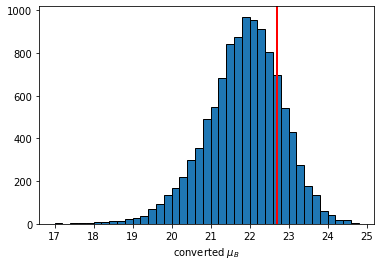

In [129]:
plt.hist(muB_conv, bins = np.arange(17, 25, 0.2), edgecolor = 'black')

plt.axvline(22.7, color = 'red', linewidth = 2)

plt.xlabel('converted $\mu_{B}$')
plt.savefig('./figs/converted_muB.png')

In [130]:
sum(muB_conv > 23)

1167

In [ ]:
sum((muB_conv > 22.7) & ()) 